# 3. Interpolation and Polynomial Approximation
### Illustration

By [Carlos Eduardo Sanchez Torres](https://twitter.com/CharllierJr)

[Numerical analysis](https://www.notion.so/sanchezcarlosjr/Numerical-analysis-f774bbfddd834cf1beffda5e9e935ff8)
[Code](https://github.com/sanchezcarlosjr/minimum-viable-products/blob/main/3_Interpolation_and_Polynomial_Approximation_Numerical_Analysis.ipynb)

Burden, Richard L., and J. Douglas Faires. Numerical Analysis. 7th ed. Belmont, CA: Brooks Cole, 2000. ISBN: 0534382169. Page 105

In [161]:
data = """x y
2 0.6931
2.2 0.7885
2.3 0.8329
"""

In [162]:
interpolating_value = "2.1"

In [163]:
value = float(interpolating_value)

In [164]:
table=list(map(lambda row: list(map(lambda column: float(column), row.split(" "))), data.split("\n")[1:][:-1]))

In [165]:
def interpolate(table: list, i=-1, j=-1) -> float:
   """
    Interpolate v2 using Neville Method and lambda calculus

    :param table = [[x0, f(x0)], [x1, f(x1)], ... [xn, f(xn)]]
   """
   if i==-1 and j==-1:
      i = len(table)-1
      j = i
   if j == 0:
     return lambda x: table[i][1] # f(xi)
   subProblem1=lambda x: (x - table[i-j][0])*interpolate(table, i, j-1)(x) # (x-x_{i-j})Q_{i,j-1}-(x-x_i)Q_{i-1,j-1}
   subProblem2=lambda x: (x - table[i][0])*interpolate(table, i-1,j-1)(x)
   subProblems = lambda x: subProblem1(x)-subProblem2(x)
   diffX = (table[i][0]-table[i-j][0]) # x_{i} - x_{i-j}
   return lambda x: subProblems(x)/diffX

In [166]:
import numpy as np
def show_table_interpolating_values(table: list, x: float) -> float:
   """
    Interpolate v3 using Neville Method and Dynamic Programming

    :param table = [[x0, f(x0)], [x1, f(x1)], ... [xn, f(xn)]]
   """
   n = len(table)
   Q = np.zeros((n,n))
   for i in range(0, n):
     Q[i][0] = table[i][1] # f(xi)
   for i in range(1, n):
     for j in range(1, i+1):
       QA=(x-table[i-j][0])*Q[i][j-1] 
       QB=(x-table[i][0])*Q[i-1][j-1]
       diffX = (table[i][0]-table[i-j][0])
       Q[i][j] = (QA-QB)/diffX
   return Q

# Neville Method matrix

In [167]:
import pandas as pd
pd.DataFrame(show_table_interpolating_values(table, value))

,0,1,2
0,0.6931,0.0000,0.0000
1,0.7885,0.7408,0.0000
2,0.8329,0.7441,0.7419


# Interpolating value

In [175]:
Q = interpolate(table)
print(f"Q({value})={Q(value)}")

Q(2.1)=0.7418999999999999


# Lagrange Polynomial Plot

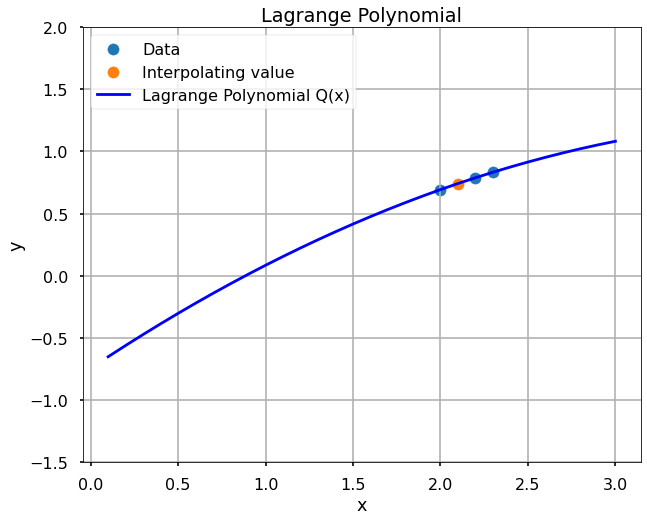

In [169]:
import matplotlib.pyplot as plt
x=np.array(table)[:,0]
y=np.array(table)[:,1]
plt.style.use('seaborn-poster')
x_new = np.arange(0.1, 3.1, 0.1)

fig = plt.figure(figsize = (10,8))
plt.scatter(x,y, label="Data")
plt.scatter(value, Q(value), label="Interpolating value")
plt.plot(x_new, Q(x_new), 'b', label="Lagrange Polynomial Q(x)")
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc="upper left")
plt.ylim(-1.5, 2.0)
plt.show()